In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3
ERROR: No matching distribution found for sqlite3


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import sqlite3

In [4]:
conn=sqlite3.connect('C:/Users/vedant kathe/Downloads/amazon_customer_data/amazon_db.sqlite')

In [5]:
type(conn)

sqlite3.Connection

In [6]:
df=pd.read_sql_query('SELECT * FROM Reviews',conn)

In [7]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [8]:
df.shape

(568454, 10)

In [9]:
!pip install TextBlob

In [10]:
from textblob import TextBlob

In [11]:
text=df['Summary'][0]
text

'Good Quality Dog Food'

In [12]:
TextBlob(text).sentiment.polarity

0.7

In [13]:
polarity=[]
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

568454

In [15]:
data=df.copy()

In [16]:
data['Polarity']=polarity

In [17]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Polarity  
0       0.7  
1       0.0  
2       0.0  
3       0.0  
4       0.8

In [18]:
data_positive=data[data['Polarity']>0]

In [19]:
data_positive.shape

(331665, 11)

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
stopwords=set(STOPWORDS)

In [23]:
data_positive.head()

Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                 Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   

                                         Summary  \
0                          Good Quality Dog Food   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   

                                                Text  Polarity  
0  I have bought several of the Vitality canned d...  0.700000  
4  Great taffy at a great price.  There was a wid...  0.800000  
5  I got a wild hair for taffy and ordered this f...  0.600000  
6  This saltwater taffy had great flavors and was...  0.358333  
7  This taffy is so good.  It is very soft and ch...  1.000000

In [24]:
total_text=(''.join(data_positive['Summary']))

In [25]:
len(total_text)

8133348

In [26]:
total_text[0:1000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat!  Just as good as the expensive brands!Wonderful, tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this "diet" food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy!Love it!GREAT SWEET CANDY!Always freshDelicious product!Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine!Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry!satisfyingLove Gluten Free Oatmeal!!!GOOD WAY TO START THE DAY....Wife\'s favorite BreakfastWhy wouldn\'t you buy oatmeal from Mcanns? Tastes great!Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won\'t order the Variety PackHOT!  And good!  Came back for more  :)Roasts up a smooth brewOur guests love it!Awesome Deal!Awsome - Kids in neighborhood loved us!great deal.Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good.How much would you

In [27]:
import re


In [28]:
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [29]:
total_text[0:5000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat   Just as good as the expensive brands Wonderful  tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this  diet  food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal   GOOD WAY TO START THE DAY    Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns  Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT   And good   Came back for more    Roasts up a smooth brewOur guests love it Awesome Deal Awsome   Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pa

In [30]:
total_text=re.sub(' +',' ',total_text)
total_text[0:5000]

'Good Quality Dog FoodGreat taffyNice TaffyGreat Just as good as the expensive brands Wonderful tasty taffyHealthy Dog FoodThe Best Hot Sauce in the WorldMy cats LOVE this diet food better than their regular foodMy Cats Are Not Fans of the New Foodfresh and greasy Love it GREAT SWEET CANDY Always freshDelicious product Great Bargain for the PriceThe Best Hot Sauce in the WorldGreat machine Best of the Instant OatmealsGood InstantGreat Irish oatmeal for those in a hurry satisfyingLove Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite BreakfastWhy wouldn t you buy oatmeal from Mcanns Tastes great Good Hot BreakfastGreat taste and conveniencegoodVery good but next time I won t order the Variety PackHOT And good Came back for more Roasts up a smooth brewOur guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Targetgreat source of electrolytesGreat for preventing crampsTaste is not so good How much would you pay for a bag of choco

(-0.5, 999.5, 499.5, -0.5)

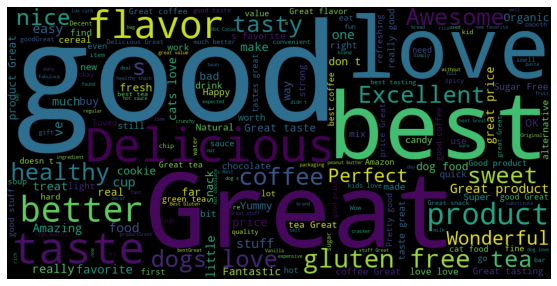

In [31]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [32]:
data_negative=data[data['Polarity']<0]
total_text2=(' '.join(data_negative['Summary']))
total_text2=re.sub('[^a-zA-Z]',' ',total_text2)

In [33]:
total_text2=re.sub(' +',' ',total_text2)

(-0.5, 999.5, 499.5, -0.5)

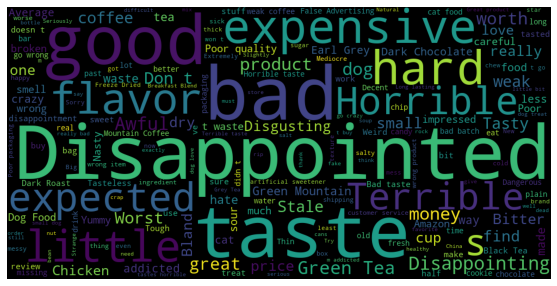

In [34]:
wordcloud2=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')

In [35]:
df['UserId'].nunique()

256059

In [36]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)

In [37]:
raw.columns=['Number_of_summaries','num_text','Avg_Score','number_of_products_purchased']

In [38]:
raw

Number_of_summaries  num_text  Avg_Score  \
UserId                                                     
A3OXHLG6DIBRW8                  448       448   4.535714   
A1YUL9PCJR3JTY                  421       421   4.494062   
AY12DBB0U420B                   389       389   4.647815   
A281NPSIMI1C2R                  365       365   4.841096   
A1Z54EM24Y40LL                  256       256   4.453125   
...                             ...       ...        ...   
A2HROKQO0GA5AF                    1         1   3.000000   
A2HROR28DMJV2W                    1         1   5.000000   
A2HRR8CO2Y20G8                    1         1   5.000000   
A2HRSML93IK9TR                    1         1   5.000000   
AZZZOVIBXHGDR                     1         1   2.000000   

                number_of_products_purchased  
UserId                                        
A3OXHLG6DIBRW8                           448  
A1YUL9PCJR3JTY                           421  
AY12DBB0U420B                            389  
A281NPSIMI1C2R                           365  
A1Z54EM24Y40LL                           256  
...                                      ...  
A2HROKQO0GA5AF                             1  
A2HROR28DMJV2W                             1  
A2HRR8CO2Y20G8                             1  
A2HRSML93IK9TR                             1  
AZZZOVIBXHGDR                              1  

[256059 rows x 4 columns]

In [39]:
user_top_10=raw.index[0:10]

In [40]:
number_top_10=raw['number_of_products_purchased'][0:10]

Text(0, 0.5, 'Number of products purchased')

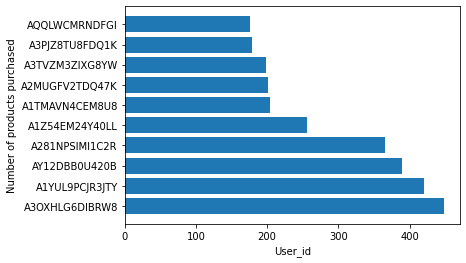

In [41]:
plt.barh(user_top_10,number_top_10,label='most recommended users',)
plt.xlabel('User_id')
plt.ylabel('Number of products purchased')

In [42]:
final=df[0:2000]
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [43]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [44]:
final.duplicated().sum()

0

In [45]:
len(final['Text'][0].split(" "))

49

In [46]:
len_lst=[]
for i in final['Text']:
    len_lst.append(len(i.split(" ")))
len_lst    

[49,
 31,
 99,
 43,
 30,
 72,
 53,
 28,
 26,
 25,
 149,
 68,
 79,
 15,
 22,
 24,
 42,
 27,
 131,
 30,
 46,
 45,
 27,
 20,
 61,
 14,
 22,
 38,
 95,
 149,
 89,
 18,
 203,
 94,
 94,
 74,
 44,
 47,
 106,
 51,
 112,
 228,
 31,
 37,
 44,
 40,
 50,
 23,
 50,
 40,
 19,
 77,
 220,
 35,
 66,
 62,
 36,
 36,
 28,
 23,
 30,
 30,
 17,
 180,
 54,
 32,
 139,
 91,
 42,
 18,
 70,
 125,
 74,
 314,
 16,
 19,
 100,
 60,
 25,
 36,
 39,
 26,
 445,
 80,
 63,
 50,
 82,
 37,
 127,
 50,
 38,
 22,
 43,
 189,
 24,
 61,
 158,
 58,
 80,
 38,
 34,
 19,
 49,
 35,
 33,
 52,
 16,
 80,
 55,
 134,
 31,
 56,
 349,
 24,
 59,
 23,
 40,
 94,
 298,
 133,
 76,
 94,
 82,
 128,
 94,
 57,
 50,
 42,
 39,
 47,
 40,
 51,
 48,
 72,
 22,
 74,
 62,
 27,
 23,
 102,
 48,
 47,
 58,
 72,
 91,
 85,
 171,
 34,
 39,
 35,
 55,
 26,
 24,
 47,
 61,
 75,
 36,
 22,
 88,
 44,
 26,
 34,
 62,
 46,
 48,
 68,
 29,
 83,
 36,
 46,
 39,
 57,
 43,
 211,
 133,
 49,
 48,
 50,
 32,
 68,
 48,
 20,
 165,
 124,
 20,
 24,
 407,
 31,
 82,
 59,
 27,
 46,
 54,
 89,
 

In [47]:
type(len_lst[0])

int

In [48]:
count=0
for i in len_lst:
    count+=i
avg=count/len(len_lst)
avg

75.292

average length of texts is 75.292

In [49]:
!pip install plotly

In [50]:
import plotly.express as px    

In [51]:
ll=pd.DataFrame(len_lst)

In [52]:
ll.columns=['Text_length']
px.box(ll,y='Text_length')


c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

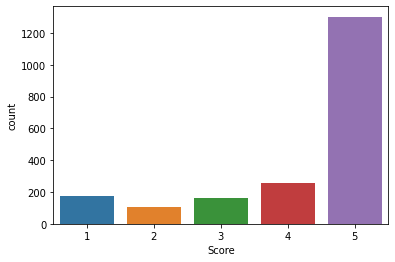

In [53]:
sns.countplot(final['Score'])

In [54]:
final['Text']=final['Text'].str.lower()

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
punctuations='''!()[]{}:;,""<>?!@$_-./'''

data=final['Text'][164]
no_punct=''
for char in data:
    if char not in punctuations:
        no_punct+=char
no_punct        

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [56]:
import string
punctuations=string.punctuation
def remove_punc(review):
    no_punct=''
    for char in review:
        if char not in punctuations:
            no_punct+=char
    return no_punct  

In [57]:
final['Text']=final['Text'].apply(remove_punc)

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  i have bought several of the vitality canned d...  
1      Not as Advertised  product arrived labeled as jumbo salted peanut...  
2  "Delight" says it all  this is a confection that has been around a fe...  
3         Cough Medicine  if you are looking for the secret ingredient i...  
4            Great taffy  great taffy at a great price  there was a wide...

In [59]:
data=final['Text'][164]

In [60]:
!pip install nltk

In [65]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\vedant
[nltk_data]     kathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
good_words=[word for word in data.split(' ') if word not in set(stopwords.words('english'))]
st=''
for i in good_words:
    st+=i
    st+=' '
st    

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [67]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [68]:
final['Text']=final['Text'].apply(remove_stopwords)

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
final['Text'][42]

'mccanns oatmeal every morning ordering amazon able save almost 300 per boxbr great product tastes great healthy'

In [74]:
pd.set_option('display.max_rows',2000)
final['Text'].str.contains('http?')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [77]:
test=final['Text'][39]

In [79]:
url_pattern=re.compile(r'href|http.\w+')
url_pattern.sub(r'',test)

'ordered wife reccomended daughter  almost every morning likes flavors  shes happy im happybr  instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6a'

In [80]:
def remove_url_link(review):
    url_pattern=re.compile(r'href|http.\w+')
    return url_pattern.sub(r'',review)

In [81]:
final['Text']=final['Text'].apply(remove_url_link)

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
final['Text'][369]

'green mountain nantucket blend kcups make good cup coffee  b40 b40 elite gourmet singlecup homebrewing systema smooth tasting brew wife prefers  people donut shop kcups keurig brewers pack 50 amazon frustrationfree packaginga generally drink morningbr br good small large cup settings wellbr br highly recommendedbr br cfh'

In [84]:
for i in range(len(final['Text'])):
    final['Text'][i]=final['Text'][i].replace('br','')

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  bought several vitality canned dog food produc...  
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...  
2  "Delight" says it all  confection around centuries  light pillowy cit...  
3         Cough Medicine  looking secret ingredient robitussin believe f...  
4            Great taffy  great taffy great price  wide assortment yummy...

(-0.5, 799.5, 799.5, -0.5)

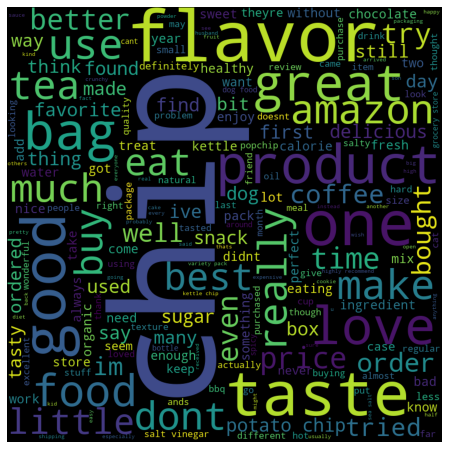

In [90]:
stopwords=set(STOPWORDS)
comments=' '.join(final['Text'])
WordClouds=WordCloud(width=800,height=800,stopwords=stopwords).generate(comments)
plt.figure(figsize=(8,8))
plt.imshow(WordClouds)
plt.axis('off')

In [91]:
from datetime import datetime

In [93]:
dt_object = datetime.fromtimestamp(final['Time'][0])
print(dt_object)
len(final['Time'])

2011-04-27 05:30:00


2000

In [104]:
final['Time'][3]

1307923200

In [105]:
dt_object=[]
for i in range(len(final['Time'])):
    dt_object.append(datetime.fromtimestamp(final['Time'][i]))


[datetime.datetime(2011, 4, 27, 5, 30),
 datetime.datetime(2012, 9, 7, 5, 30),
 datetime.datetime(2008, 8, 18, 5, 30),
 datetime.datetime(2011, 6, 13, 5, 30),
 datetime.datetime(2012, 10, 21, 5, 30),
 datetime.datetime(2012, 7, 12, 5, 30),
 datetime.datetime(2012, 6, 20, 5, 30),
 datetime.datetime(2012, 5, 3, 5, 30),
 datetime.datetime(2011, 11, 23, 5, 30),
 datetime.datetime(2012, 10, 26, 5, 30),
 datetime.datetime(2005, 2, 8, 5, 30),
 datetime.datetime(2010, 8, 27, 5, 30),
 datetime.datetime(2012, 6, 13, 5, 30),
 datetime.datetime(2010, 11, 5, 5, 30),
 datetime.datetime(2010, 3, 12, 5, 30),
 datetime.datetime(2009, 12, 29, 5, 30),
 datetime.datetime(2012, 9, 20, 5, 30),
 datetime.datetime(2012, 8, 16, 5, 30),
 datetime.datetime(2011, 12, 23, 5, 30),
 datetime.datetime(2011, 10, 8, 5, 30),
 datetime.datetime(2011, 8, 16, 5, 30),
 datetime.datetime(2011, 6, 25, 5, 30),
 datetime.datetime(2011, 5, 9, 5, 30),
 datetime.datetime(2011, 5, 4, 5, 30),
 datetime.datetime(2011, 1, 20, 5, 30),


In [106]:
final['date_time']=dt_object

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

        date_and_time           date_time  
0 2008-03-30 05:30:00 2011-04-27 05:30:00  
1 2008-03-30 05:30:00 2012-09-07 05:30:00  
2 2008-03-30 05:30:00 2008-08-18 05:30:00  
3 2008-03-30 05:30:00 2011-06-13 05:30:00  
4 2008-03-30 05:30:00 2012-10-21 05:30:00

In [108]:
f2=final.drop(['date_and_time','Time'],axis=1)

In [109]:
f2.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score                Summary  \
0                     1                       1      5  Good Quality Dog Food   
1                     0                       0      1      Not as Advertised   
2                     1                       1      4  "Delight" says it all   
3                     3                       3      2         Cough Medicine   
4                     0                       0      5            Great taffy   

                                                Text           date_time  
0  bought several vitality canned dog food produc... 2011-04-27 05:30:00  
1  product arrived labeled jumbo salted peanutsth... 2012-09-07 05:30:00  
2  confection around centuries  light pillowy cit... 2008-08-18 05:30:00  
3  looking secret ingredient robitussin believe f... 2011-06-13 05:30:00  
4  great taffy great price  wide assortment yummy... 2012-10-21 05:30:00

In [112]:
type(f2['date_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [113]:
f2['year']=f2['date_time'].dt.year

In [114]:
f2.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score                Summary  \
0                     1                       1      5  Good Quality Dog Food   
1                     0                       0      1      Not as Advertised   
2                     1                       1      4  "Delight" says it all   
3                     3                       3      2         Cough Medicine   
4                     0                       0      5            Great taffy   

                                                Text           date_time  year  
0  bought several vitality canned dog food produc... 2011-04-27 05:30:00  2011  
1  product arrived labeled jumbo salted peanutsth... 2012-09-07 05:30:00  2012  
2  confection around centuries  light pillowy cit... 2008-08-18 05:30:00  2008  
3  looking secret ingredient robitussin believe f... 2011-06-13 05:30:00  2011  
4  great taffy great price  wide assortment yummy... 2012-10-21 05:30:00  2012

In [115]:
f2['month']=f2['date_time'].dt.month
f2['weekday']=f2['date_time'].dt.day_name()

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='month', ylabel='count'>

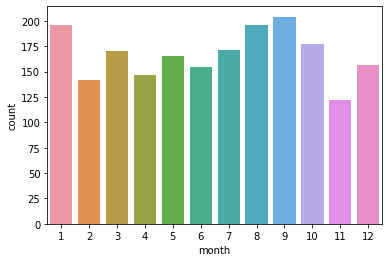

In [116]:
sns.countplot('month',data=f2)

c:\users\public\anaconda3\envs\amazonsent\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='weekday', ylabel='count'>

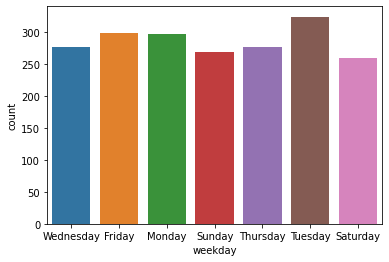

In [117]:
sns.countplot('weekday',data=f2)

In [120]:
unique_pr=f2['ProductId'].unique()

In [135]:
lp=f2['ProductId'].value_counts()

In [146]:
px.bar(f2,x=f2['ProductId'].unique()[0:5],y=f2['ProductId'].value_counts()[0:5])